# Risk sharing, moral hazard and credit rationing

**Note:** this jupyter notebook mixes text, math, visualizations and python code.  To keep things uncluttered most of the code was placed in a [code section](#codesection) at the end.  If you are running on a jupyter server and want to recreate or modify content or run interactive widgets, navigate to the code section for instructions first.

**Slideshow mode**: this notebook can be viewed as a slideshow by pressing Alt-R if run on a server.

A farmer has access to a risky asset, say a pineapple tree. 

If diligent (e.g. tree is watered/fertilized) it will generate state-contingent claims: 
 -  $x_1$ in state of the world 1 with probability $p$
 - $x_0<x_1$ in state of the world 0, with probability $(1-p)$ 
 - For expected return:

$$E(x|p) = p \cdot x_1 + (1-p) \cdot x_0$$

Note: we motivate with the two-outcome case but the notation allows for adaptation to the more general case of $N$ outcomes $x_i$ and a finite number $M$ (or infinite continuum) of effort or action/diligence levels $e$ that shift the probability density function of $x_i$:

$$E(x|e) = \sum_i {x_i \cdot f(x_i|e)}$$

### Financial Contracting with action-contingent contracts

Action/diligence is observable and verifiable. 
Contracts include enforceable clauses of the form: if farmer fails to be diligent they pay a heavy penalty.

### Financial contracting under Competition
- Risk averse farmer wants to smooth consumption. 
- Wants to sell state-contingent claims $x_i$ in exchange for a smoother consumption bundle $(c_1, c_0)$.  
- Financial Intermediaries (FIs) compete to offer contract 

Competitive market contract maxes farmer's von-Neumann Morgenstern expected utility: 

$$\max_{c_0,c_1}   EU(c|p)$$

subject to FI's participation (or zero-profit) constraint:

$$E(x|p)-E(c|p) \geq 0$$

where $EU(c|p) = p u(c_1) + (1-p) u(c_0)$ 

#### Investment lending and risk
More interesting (but hardly changing the math that follows) assume also:
- Farmer must pay lump sum $I$ to initiate project (e.g. purchase fertilizer or pay land rent).
- Assume must borrow entirety from a FI.  

**FI's participation (zero profit) constraint:$$

$$E(x|p)-E(c|p) \geq I(1+r)$$

where $r$ expresses the FI's opportunity cost of funds.

As a Lagrangean: 

$$\mathcal{L}(c_1,c_2,\lambda) = EU(c|P) + \lambda [E(x|p) - E(c|p) + I(1+r)]$$

First-order necessary conditions (FOCs) for an optimum:

$$p \cdot u'(c_i) = p \cdot  \lambda \ \ \ \forall i$$

- Implies $u'(c_i) = \lambda$ for each $i$ 
- optimum contract offers constant consumption $c_1 = c_2 = \bar c$.

### Financial contracting under Monopoly
- As above but objective and constraint reversed.  Maximize FI's profits

$$\max_{c_0,c_1}  E(x|p)-E(c|p) $$

subject to farmers participation constraint:

$$ EU(c|p) \geq \bar u$$

where $bar u$ is their reservation utility, or expected utility from next best choice.

FOCs essentially same as competitive case but now substituted into different constraint.

## The consumer's optimum

$$L(c_1,c_2) = U(c_1,c_2) + \lambda (I - p_1 c_1  - p_2 c_2) $$




Differentiate with respect to $c_1$ and $c_2$ and $\lambda$ to get:

$$ U_1 = \lambda{p_1}$$

$$ U_2 = \lambda{p_2}$$

$$ I = p_1 c_1  + p_2 c_2$$

Dividing the first equation by the second we get the familiar necessary tangency condition for an interior optimum:

$$MRS = \frac{U_1}{U_2} =\frac{p_1}{p_2}$$

Using our earlier expression for the MRS of a Cobb-Douglas indifference curve, substituting this into the budget constraint and rearranging then allows us to solve for the Marshallian demands:

$$c_1(p_1,p_2,I)=\alpha \frac{I}{p_1}$$

$$c_1(p_1,p_2,I)=(1-\alpha) \frac{I}{p_2}$$

# Moral Hazard
##  Incentive Compatibility Constraint

Now two effort levels: Low $e_L$ (probability of success q) or High $e_H$ (probability of success p).
Agent's private benefit from avoiding diligence or effort is B.  

Effort is non-contractible and B cannot be observed/seized. Incentive compatibility constraint:

$$EU(c|p) \geq EU(c|q) + B$$

In 2 outcome case can be re-arranged to:

$$u(c_1) \geq u(c_0) + \frac{B}{p-q}$$





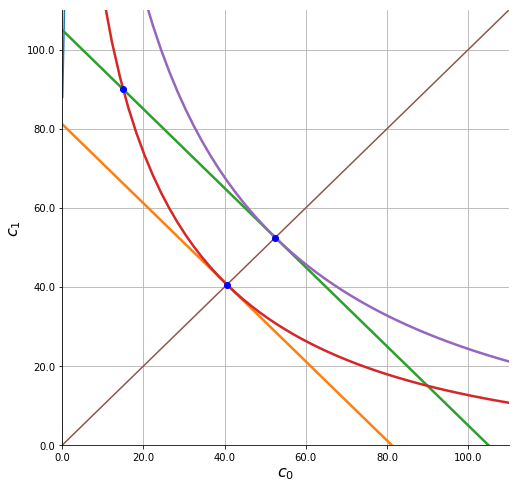

In [9]:
consume_plot(p,q,B, 0,ic=True)

The following interactive widget will be visible and active only if you are running this on a jupyter server.

In [10]:
interact(consume_plot,p=fixed(0.5),q=(0.1,0.5,0.01),B=(0,3,0.1),oassets=(0,60,10));

interactive(children=(FloatSlider(value=0.30000000000000004, description='q', max=0.5, min=0.1, step=0.01), FloatSlider(value=1.0, description='B', max=3.0), IntSlider(value=30, description='oassets', max=60, step=10), Checkbox(value=False, description='ic'), Output()), _dom_classes=('widget-interact',))

If we set this up and solve it as a Lagrangean (loosely following Holmstrom, 1979) we get a condition like this:

$$\frac{1}{u'(c_i)} = \lambda + \mu \cdot 
\left [ {1-\frac{f(x_i,e_L)}{f(x_i,e_H)}} \right ]  \text{ }\forall i
$$

In our two outcome case $p=f(x_1|e_H)$ and $q=f(x_1|e_L)$ and this becomes:

$$\frac{1}{u'(c_1)} = \lambda + \mu \cdot 
\left [ {1-\frac{q}{p}} \right ]  
$$

$$\frac{1}{u'(c_0)} = \lambda + \mu \cdot 
\left [ {1-\frac{1-q}{1-p}} \right ]  
$$

TODO:  
 - Functions to solve the two outcome cases (closed form possible, substitute IC into binding PC; or 2 FOC plus IC plus PC for $c_0, c_1, \lambda  \text{ and } \mu$).
 - Function to solve numerically for N outcomes (N FOCs and one participation constraint).
 - discuss how sensitive to distribution

Holmstrom's sufficient statistic

$$\frac{1}{u'(c)} = \lambda + \mu \cdot 
\left [ {1-\frac{f(x,y,e_L)}{f(x,y,e_H)}} \right ]  \text{ }\forall i
$$

<a id='codesection'></a>
## Code Section
**Note:** To re-create or modify any content go to the 'Cell' menu above run all code cells below by choosing 'Run All Below'.  Then 'Run all Above' to recreate all output above (or go to the top and step through each code cell manually).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from ipywidgets import interact, fixed

### Assumed parameters

In [2]:
alpha = 0.25

In [3]:
def u(c, alpha=alpha):
    return (1/alpha)*c**alpha

def E(x,p):
    return p*x[1] + (1-p)*x[0]

def EU(c, p):
    return p*u(c[1]) + (1-p)*u(c[0])

def budgetc(c0, p, x):
    return E(x,p)/p - ((1-p)/p)*c0

def indif(c0, p, ubar):
    return (alpha*(ubar-(1-p)*u(c0))/p)**(1/alpha)

def IC(c0,p,q,B):
    '''incentive compatibility line'''
    return (alpha*(u(c0)+B/(p-q)))**(1/alpha)

In [4]:
def Bopt(p,x):
    '''Bank profit maximum'''
    return (alpha*EU(x,p))**(1/alpha)

def Copt(p,x):
    '''Consumer utility maximum'''
    return E(x,p)    

In [5]:
x = [15,90]
p = 0.6

## Interactive indifference curve diagram

Default parameters for example

In [6]:
p = 0.5
q = 0.4
cmax = 100
B = 1

In [7]:
def consume_plot(p,q,B, oassets,ic=False):
    c0 = np.linspace(0.1,200,num=100)
    
    #bank optimum
    c0e = Bopt(p,x)
    c1e = c0e
    uebar = EU([c0e,c1e],p)
    idfc = indif(c0, p, uebar)
    budg = budgetc(c0, p, [c0e,c1e])
    
    #consumer optimum
    c0ee = Copt(p,x)
    c1ee = c0ee
    uemax = EU([c0ee,c1ee],p)
    idfcmax = indif(c0, p, uemax)
    zerop = budgetc(c0, p, x)
    icline = IC(c0,p,q,B)
       
    
    fig, ax = plt.subplots(figsize=(8,8))
    if ic:
        ax.plot(c0,icline)
    ax.plot(c0, budg, lw=2.5)
    ax.plot(c0, zerop, lw=2.5)
    ax.plot(c0, idfc, lw=2.5)
    ax.plot(c0, idfcmax, lw=2.5)
    ax.plot(c0,c0)
    #ax.vlines(c0e,0,c2e, linestyles="dashed")
    #ax.hlines(c1e,0,c1e, linestyles="dashed")
    ax.plot(c0e,c1e,'ob')
    ax.plot(c0ee,c1ee,'ob')
    ax.plot(x[0],x[1],'ob')
    ax.set_xlim(0, 110)
    ax.set_ylim(0, 110)
    ax.set_xlabel(r'$c_0$', fontsize=16)
    ax.set_ylabel('$c_1$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    xticks = ax.get_xticks()-oassets
    ax.set_xticklabels(xticks)
    ax.set_yticklabels(xticks)
    plt.show()

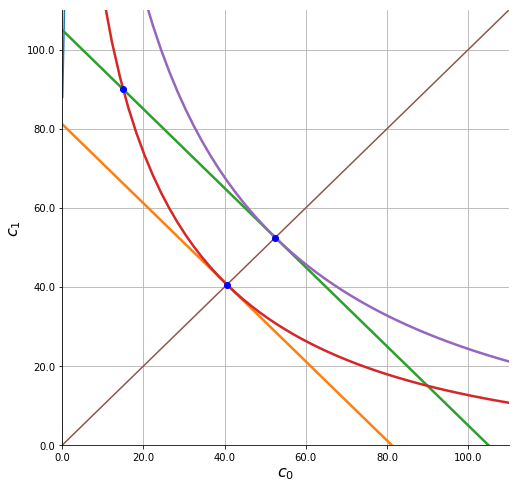

In [8]:
consume_plot(p,q,B, 0,ic=True)